In [1]:
using DataFrames
using DataStructures
using GLM
using LsqFit
using MLBase
using Plots
using PyCall
using RDatasets
using Statistics
using StatsBase
using Tables
using XLSX

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278
┌ Info: Precompiling XLSX [fdbf4ff8-1666-58a4-91e7-1b58723a45e0]
└ @ Base loading.jl:1278


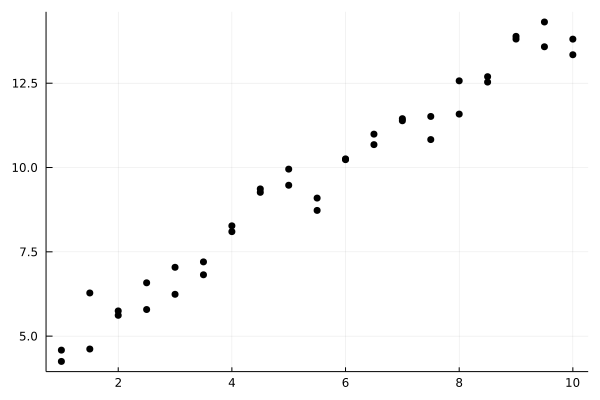

In [2]:
xvals = repeat(1:0.5:10, inner=2)
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals))
scatter(xvals, yvals, color=:black, leg=false)

In [3]:
function find_best_fit(xv, yv)
    xmean = mean(xv)
    ymean = mean(yv)
    xsd = std(xv)
    ysd = std(yv)
    r = cor(xv, yv)
    a = r * ysd/xsd
    b = ymean - a*xmean
    a, b
end

find_best_fit (generic function with 1 method)

In [4]:
a, b = find_best_fit(xvals, yvals)
println("$a, $b")
yfit = a .* xvals .+ b;

1.0640480324539274, 3.6866124334175474


In [5]:
np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/dsatterthwaite/.julia/conda/3/lib/python3.7/site-packages/numpy/__init__.py'>

  0.300449 seconds (917.46 k allocations: 47.997 MiB, 4.17% gc time)


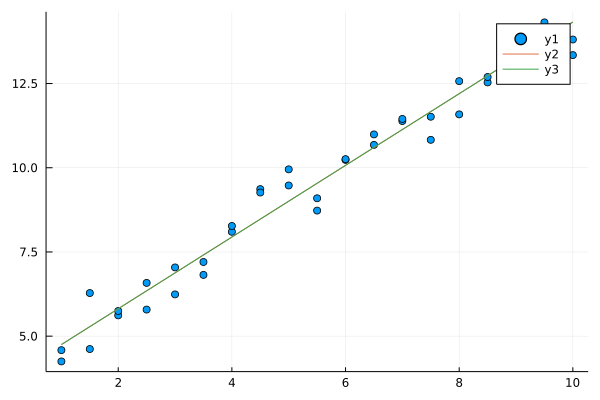

In [6]:
@time myfit = np.polyfit(xvals, yvals, 1)
yfit2 = collect(xvals) .* myfit[1] .+ myfit[2]

scatter(xvals, yvals)
plot!(xvals, yfit)
plot!(xvals, yfit2)

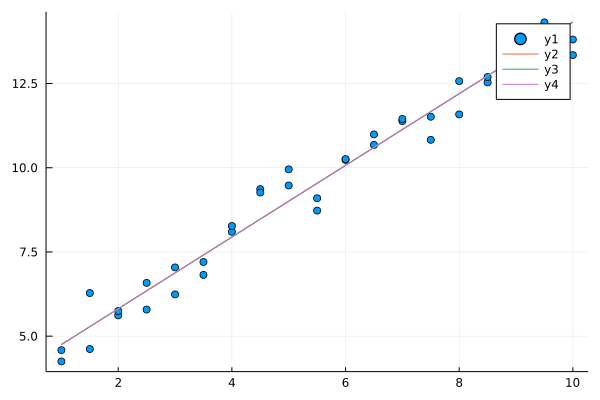

In [7]:
data = DataFrame(X=xvals, Y=yvals)
ols = lm(@formula(Y ~ X), data)
plot!(xvals, predict(ols))

In [8]:
R = XLSX.readxlsx("zillow_data_download_april2020.xlsx")

XLSXFile("zillow_data_download_april2020.xlsx") containing 4 Worksheets
            sheetname size          range        
-------------------------------------------------
 MonthlyListings_City 8348x91       A1:CM8348    
     Sale_counts_city 28760x148     A1:ER28760   
Sales_median_price_c… 3767x148      A1:ER3767    
                 meta 1x1           A1:A1        


In [9]:
salecounts = R["Sale_counts_city"][:]
salecounts_df = DataFrame(salecounts[2:end, :], Symbol.(salecounts[1, :]))
monthlylistings = R["MonthlyListings_City"][:]
monthlylistings_df = DataFrame(monthlylistings[2:end, :], 
                               Symbol.(monthlylistings[1, :]))

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03
,Any,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,28904,28155,30596
2,2,12447,Los Angeles,City,CA,6431,6613,6467
3,3,39051,Houston,City,TX,11696,11737,12291
4,4,17426,Chicago,City,IL,9523,9609,9772
5,5,6915,San Antonio,City,TX,7223,7170,7438
6,6,13271,Philadelphia,City,PA,7505,7266,7578
7,7,40326,Phoenix,City,AZ,6232,5720,5872
8,8,18959,Las Vegas,City,NV,7027,6218,6199
9,9,54296,San Diego,City,CA,4121,3844,3932


In [10]:
monthlylistings_2020_02 = monthlylistings_df[!, [1, 2, 3, 4, 5, end]]
rename!(monthlylistings_2020_02, Symbol("2020-02") .=> Symbol("listings"))
salecounts_2020_02 = salecounts_df[!, [1, end]]
rename!(salecounts_2020_02, Symbol("2020-02") .=> Symbol("sales"))

,RegionID,sales
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


In [12]:
Feb2020data = innerjoin(
    monthlylistings_2020_02, salecounts_2020_02, on=:RegionID)
dropmissing!(Feb2020data)
sales = Feb2020data[!, :sales]
counts = Feb2020data[!, :listings]
states = Feb2020data[!, :StateName]
C = counter(states)
C.map
countvals = values(C.map)
topstates = sortperm(collect(countvals), rev=true)[1:9]
statesofinterest = collect(keys(C.map))[topstates]

9-element Array{Any,1}:
 "CA"
 "FL"
 "IL"
 "NJ"
 "MI"
 "TX"
 "PA"
 "OH"
 "NC"

In [13]:
first(Feb2020data, 5)

,SizeRank,RegionID,RegionName,RegionType,StateName,listings,sales
,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164,4054
2,2,12447,Los Angeles,City,CA,5553,1522
3,3,39051,Houston,City,TX,11654,2682
4,4,17426,Chicago,City,IL,9417,2100
5,5,6915,San Antonio,City,TX,6887,1626


(state, coef(ols)) = ("CA", [6.803086464628309, 0.28798374289950357])
(state, coef(ols)) = ("FL", [19.126255819233386, 0.15510798334559428])
(state, coef(ols)) = ("IL", [0.6626439876883514, 0.2226325765807212])
(state, coef(ols)) = ("NJ", [-1.9635911642225732, 0.2650303535602978])
(state, coef(ols)) = ("MI", [-0.9181942041703473, 0.29768705032459525])
(state, coef(ols)) = ("TX", [5.241220767319292, 0.24566620049636262])
(state, coef(ols)) = ("PA", [-0.21362448579952723, 0.3101955410309725])
(state, coef(ols)) = ("OH", [-6.026958739166818, 0.47909280478486926])
(state, coef(ols)) = ("NC", [-24.60003985327959, 0.5302793903364814])


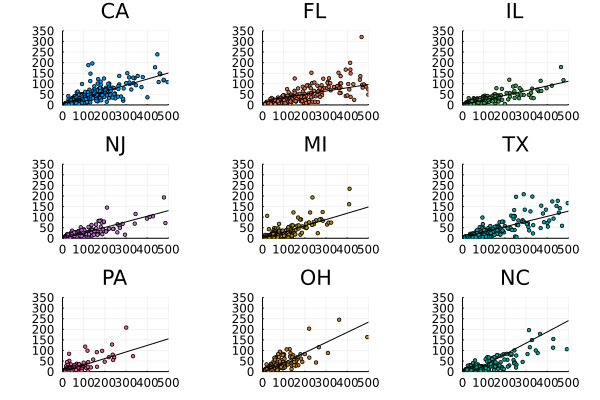

In [15]:
allplots = Array{Plots.Plot}(undef, 9)
for (i, state) in enumerate(statesofinterest)
    ids = findall(Feb2020data[!, :StateName] .== state)
    data = DataFrame(X=float.(counts[ids]), Y=float.(sales[ids]))
    ols = GLM.lm(@formula(Y ~ X), data)
    allplots[i] = scatter(counts[ids], 
                          sales[ids], 
                          markersize=2, 
                          xlim=(0, 500), 
                          ylim=(0, 350), 
                          color=i, 
                          aspect_ratio=:equal, 
                          legend=false, 
                          title=state)
    @show state, coef(ols)
    plot!(counts[ids], predict(ols), color=:black)
end
plot(allplots..., layout=(3, 3), size=(600, 400))

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])


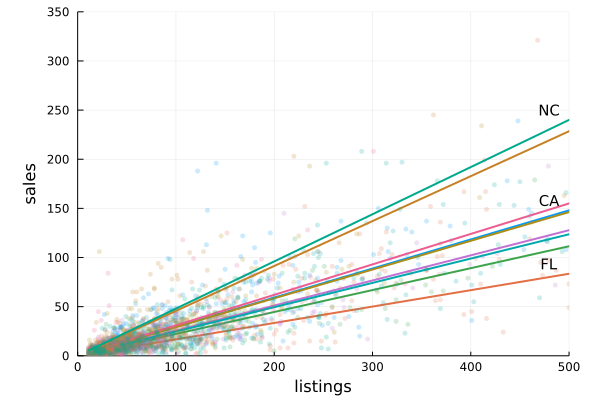

In [18]:
plot()
for (i, si) in enumerate(statesofinterest)
    curids = findall(Feb2020data[!, :StateName] .== si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)
    scatter!(counts[curids], 
             sales[curids], 
             markersize=2, 
             xlim=(0, 500), 
             ylim=(0, 350), 
             color=i, 
             aspect_ratio=:equal, 
             legend=false, 
             marker=(3, 3, stroke(0)), 
             alpha=0.2)
    if si == "NC" || si == "CA" || si == "FL"
        annotate!([(500 - 20, 10 + coef(ols)[1]*500, text(si, 10))])
    end
    @show si, coef(ols)
    plot!(counts[curids], predict(ols), color=i, linewidth=2)
end
xlabel!("listings")
ylabel!("sales")

In [19]:
lmap = labelmap(Feb2020data[!, :StateName])
ci = labelencode(lmap, Feb2020data[!, :StateName])

5508-element Array{Int64,1}:
  1
  2
  3
  4
  3
  5
  6
  7
  3
  3
  2
  8
  3
  ⋮
  8
  3
 46
 31
 11
  2
 33
 13
 42
  4
  3
  3

## Logistic Regression

In [21]:
cats = dataset("MASS", "cats")
first(cats, 5)

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


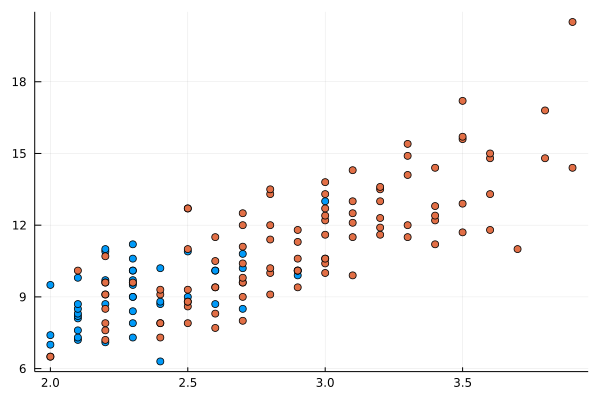

In [27]:
lmap = labelmap(cats[!, :Sex])
ci = labelencode(lmap, cats[!, :Sex])
scatter(cats[!, :BWt], cats[!, :HWt], color=ci, legend=false)

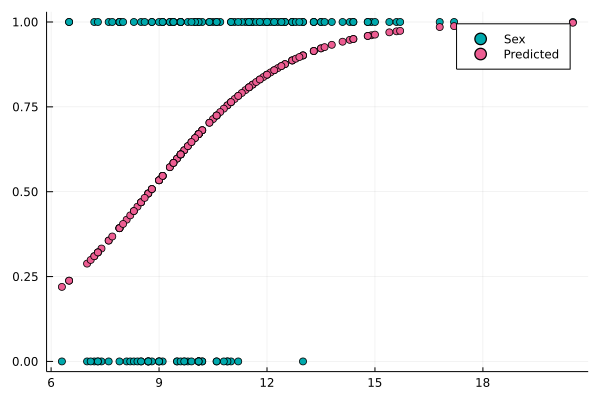

In [29]:
data = DataFrame(X=cats[!, :HWt], Y=ci .- 1)
probit = glm(@formula(Y ~ X), data, Binomial(), LogitLink())
scatter(data[!, :X], data[!, :Y], label="Sex", color=6)
scatter!(data[!, :X], predict(probit), label="Predicted", color=7)

## Nonlinear Regression

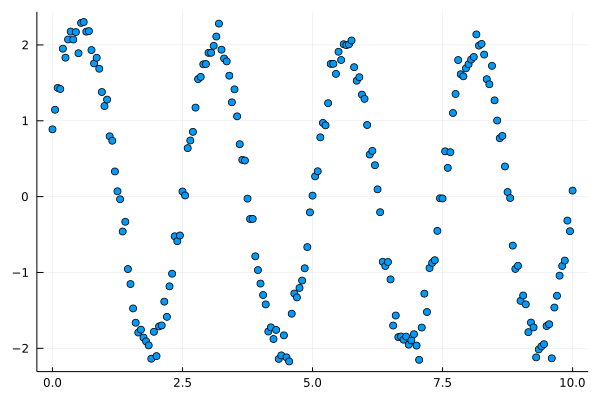

In [34]:
xvals = 0:0.05:10
yvals = 1*exp.(-xvals*2) + 2*sin.(0.8*pi*xvals) + 0.15*randn(length(xvals))
scatter(xvals, yvals, legend=false)

In [36]:
@. model(x, p) = p[1]*exp(-x*p[2]) + p[3]*sin(0.8*pi*x)
p0 = [0.5, 0.5, 0.5]
fit = curve_fit(model, xvals, yvals, p0)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([1.0609960114187422, 2.3087102351623203, 2.008317016301989], [0.17380119199439026, 0.05152618355721983, -0.09180899217099348, 0.07053368864965948, -0.314396833770497, -0.05578858671661413, -0.16650755115504978, -0.15536995507071882, 0.045639137346928926, 0.02313380397567899  …  -0.13489958365622146, 0.4360619529992271, -0.08519686504549062, -0.0673360456767067, -0.1386569971865752, -0.05324027248919627, 0.10374731147077898, -0.18358382926611938, 0.20430812998422787, -0.0793638675308457], [1.0000000000093576 0.0 0.0; 0.8909780280003416 -0.04726620669982278 0.12533323356770823; … ; 1.0368143206111935e-10 -1.1137736259258452e-9 -0.12533323356542592; 9.504131272269273e-11 -9.976314563774282e-10 0.0], true, Float64[])

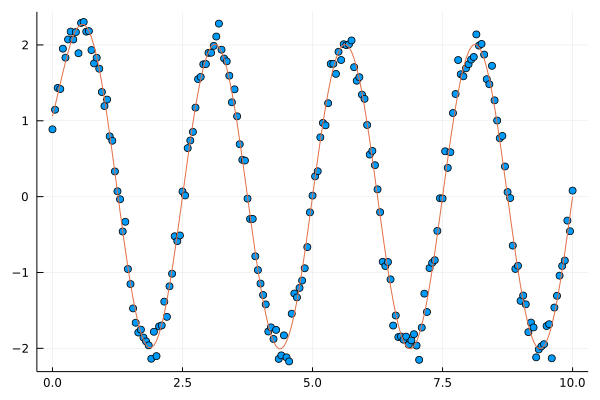

In [37]:
p = fit.param
preds = p[1]*exp.(-xvals*p[2]) + p[3]*sin.(0.8*pi*xvals)
scatter(xvals, yvals, legend=false)
plot!(xvals, preds)